<a href="https://colab.research.google.com/github/am-galal/healthcare-predictive-analytical-application-for-heart-diseases/blob/remon/Graduation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/DEPI/graduation project /dataset/heart_2022_with_nans.csv"
data=pd.read_csv(path)

In [4]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [6]:
##cheack if data has duublicate
data.duplicated().sum()

np.int64(157)

In [7]:
data=data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [8]:
 data.drop(['RemovedTeeth'],axis =1, inplace=True)

In [9]:
# data.drop(['HadSkinCancer'],axis =1, inplace=True)

In [10]:
# data.drop(['DeafOrHardOfHearing'],axis =1, inplace=True)

In [11]:
# data.drop(['BlindOrVisionDifficulty'],axis =1, inplace=True)

In [12]:
# data.drop(['DifficultyConcentrating'],axis =1, inplace=True)

In [13]:
# data.drop(['DifficultyDressingBathing'],axis =1, inplace=True)

In [14]:
# data.drop(['HeightInMeters'],axis =1, inplace=True)

In [15]:
# data.drop(['HadCOPD'],axis =1, inplace=True)

In [16]:
# data.drop(['HadAsthma'],axis =1, inplace=True)

In [17]:
# data.drop(['HadKidneyDisease'],axis =1, inplace=True)

In [18]:
## cheack if data has nulls
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,1193
PhysicalHealthDays,10922
MentalHealthDays,9062
LastCheckupTime,8301
PhysicalActivities,1088
SleepHours,5448
HadHeartAttack,3060
HadAngina,4400


In [19]:
#VALIUES IN hadhurt attack
data['HadHeartAttack'].value_counts()
no_in_heart_attack=data['HadHeartAttack'].value_counts()[0]
yes_in_heart_attack=data['HadHeartAttack'].value_counts()[1]


<ipython-input-19-f7b79a6505ba>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no_in_heart_attack=data['HadHeartAttack'].value_counts()[0]
<ipython-input-19-f7b79a6505ba>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yes_in_heart_attack=data['HadHeartAttack'].value_counts()[1]


In [20]:
#make a group by between hadheartattack and genralhealth
data.groupby(['HadHeartAttack','GeneralHealth']).size()

HadHeartAttack  GeneralHealth
No              Excellent         70469
                Fair              52299
                Good             134233
                Poor              15143
                Very good        143681
Yes             Excellent          1097
                Fair               7228
                Good               8295
                Poor               4161
                Very good          4214
dtype: int64

In [21]:
#cheak the nulls in heartattack when general heath is Excellent
data[(data['HadHeartAttack'].isna()) & (data['GeneralHealth']=='Excellent')]
data.drop(data[(data['HadHeartAttack'].isna()) & (data['GeneralHealth']=='Excellent')].index, inplace=True)

In [22]:
data.groupby(['HadHeartAttack','GeneralHealth']).size()

HadHeartAttack  GeneralHealth
No              Excellent         70469
                Fair              52299
                Good             134233
                Poor              15143
                Very good        143681
Yes             Excellent          1097
                Fair               7228
                Good               8295
                Poor               4161
                Very good          4214
dtype: int64

In [23]:
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,1193
PhysicalHealthDays,10900
MentalHealthDays,9045
LastCheckupTime,8261
PhysicalActivities,1074
SleepHours,5423
HadHeartAttack,2805
HadAngina,4321


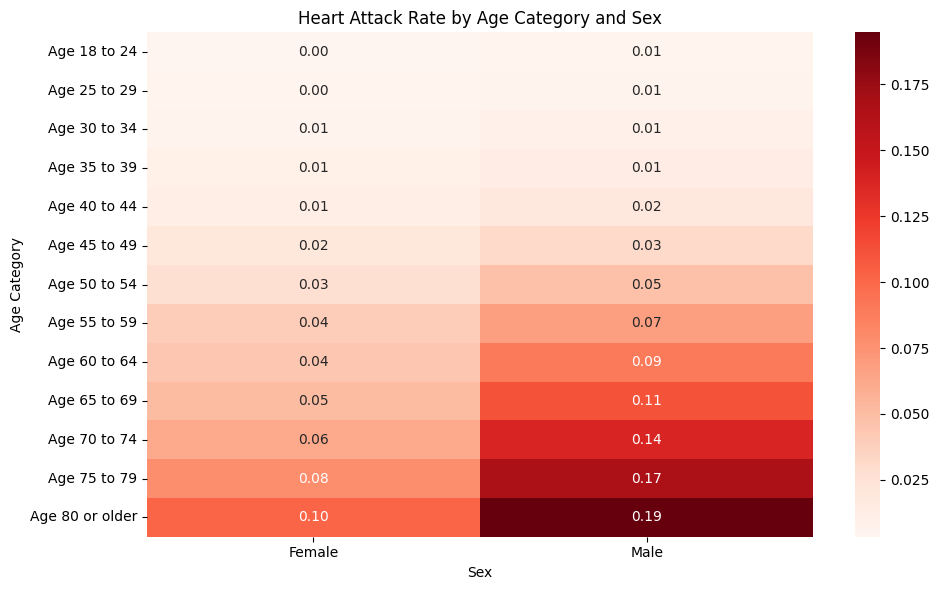

In [24]:
pivot = data.pivot_table(
    index="AgeCategory",
    columns="Sex",
    values="HadHeartAttack",
    aggfunc=lambda x: (x == "Yes").mean()
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="Reds", fmt=".2f")
plt.title("Heart Attack Rate by Age Category and Sex")
plt.xlabel("Sex")
plt.ylabel("Age Category")
plt.tight_layout()
plt.show()

In [29]:
def plot_heart_attack_rate_by(column):
    # Calculate % of "Yes" in HadHeartAttack for each group
    rates = data.groupby(column)["HadHeartAttack"].apply(lambda x: (x == "Yes").mean()).sort_values(ascending=False)

    # Plot it
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rates.values, y=rates.index, palette="Reds_r")
    plt.title(f"Heart Attack Rate by {column}")
    plt.xlabel("Heart Attack Rate")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


<ipython-input-29-0c465a9329a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.values, y=rates.index, palette="Reds_r")


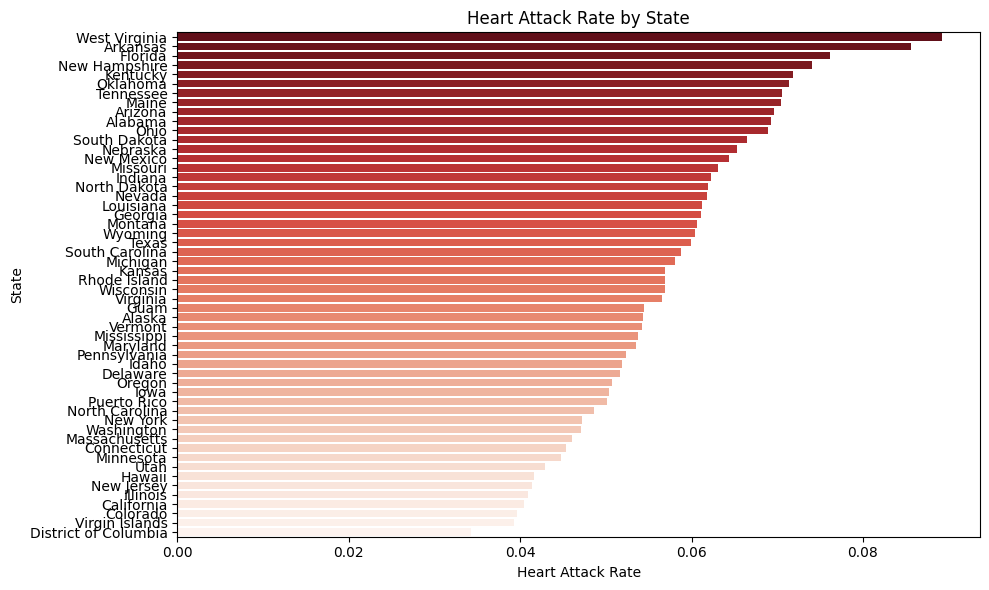

In [30]:
plot_heart_attack_rate_by("State")

<ipython-input-29-0c465a9329a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.values, y=rates.index, palette="Reds_r")


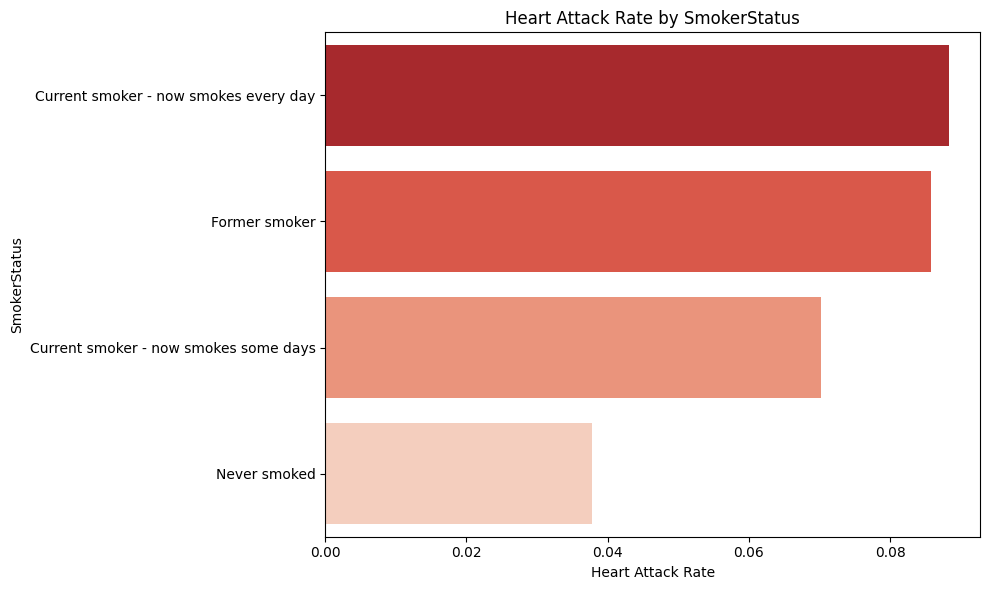

In [31]:
plot_heart_attack_rate_by("SmokerStatus")

<ipython-input-34-a4539a63a0c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="HadHeartAttack", y="BMI", data=data, palette="Reds")


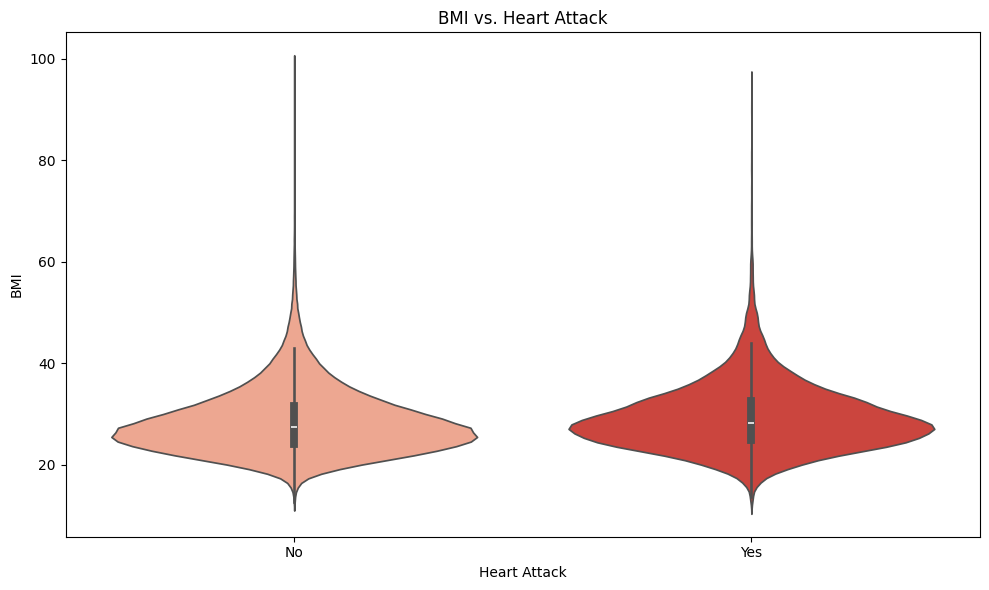

In [34]:
#Is there a relationship between BMI and HadHeartAttack?violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x="HadHeartAttack", y="BMI", data=data, palette="Reds")
plt.title("BMI vs. Heart Attack")
plt.xlabel("Heart Attack")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

In [32]:
#found who smoke and didn't have heart attack
data[(data['SmokerStatus']=='Current') & (data['HadHeartAttack']=='No')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos


In [24]:
  # hadel nulls in WeightInKilograms by mod
data['WeightInKilograms'].fillna(data['WeightInKilograms'].mode()[0], inplace=True)

<ipython-input-24-28154643e902>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['WeightInKilograms'].fillna(data['WeightInKilograms'].mode()[0], inplace=True)


In [26]:
#fill all data with midian
data.fillna(data.ffill(), inplace=True)

In [27]:
#handel nulls with backwards
data.fillna(method='bfill', inplace=True)


<ipython-input-27-d6ed7faa274d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [28]:
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
HadHeartAttack,0
HadAngina,0


In [29]:
catlist=[]
numlist=[]
for coulmn in data.columns:
  if data[coulmn].dtype == 'object':
    catlist.append(coulmn)
  else:
    numlist.append(coulmn)
catlist


['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [30]:
from sklearn.preprocessing import OrdinalEncoder
orde=OrdinalEncoder()
orde.fit(data[catlist])
data[catlist]=orde.transform(data[catlist])




In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['HadHeartAttack','GeneralHealth'], axis=1), data['HadHeartAttack'], test_size=0.02, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.9450252951096122

In [41]:
rf.score(x_train,y_train)

0.9999747605116732

In [42]:
rf.score(x_test,y_test)

0.9450252951096122

In [43]:

print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8379
         1.0       0.59      0.18      0.27       516

    accuracy                           0.95      8895
   macro avg       0.77      0.58      0.62      8895
weighted avg       0.93      0.95      0.93      8895



In [34]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,8.0,0.0,0.0,...,1.60,90.72,26.57,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,...,1.60,68.04,26.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,2.0,3.0,3.0,1.0,5.0,0.0,0.0,...,1.57,63.50,25.61,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,3.0,1.0,7.0,0.0,0.0,...,1.65,63.50,23.30,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,2.0,0.0,3.0,1.0,9.0,0.0,0.0,...,1.57,53.98,21.77,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
data.to_csv('exported_heart_data.csv', index=False)

# How does heart attack risk vary by:

AgeCategory?

Gender?

State?

SmokerStatus?

→ Use: Bar plots

TypeError: heatmap() takes 1 positional argument but 5 positional arguments (and 1 keyword-only argument) were given